<a href="https://colab.research.google.com/github/Phantasm320/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/Linear_Regression_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import everything you could ever need. ;)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [54]:
# Ukraine Used Car Sale Price Prediction
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.head()

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
0,23,15500.0,0,68,2.5,1,1,2010,1
1,50,20500.0,3,173,1.8,1,1,2011,2
2,50,35000.0,2,135,5.5,3,1,2008,2
3,50,17800.0,5,162,1.8,0,1,2012,0
4,55,16600.0,0,83,2.0,3,1,2013,1


# Predictive Modeling with Linear Regression

## 1.1 Divide the dataset features into an X matrix and y vector ("price" is what we want to predict).

Steps to dividing dataset features in an X matrix and y vector:

- Create a new dataframe, dropping the price column
- Create a vector column for price 
- Check shapes of each feature to ensure proper execution 

In [55]:
# New dataframe without price column
X_df = df.drop('price', axis=1)

# Create y vector
y_df = df['price']

# Check shapes
print("X matrix shape: {}".format(X_df.shape))
print("")
print("y vector shape: {}".format(y_df.shape))

X matrix shape: (8495, 8)

y vector shape: (8495,)


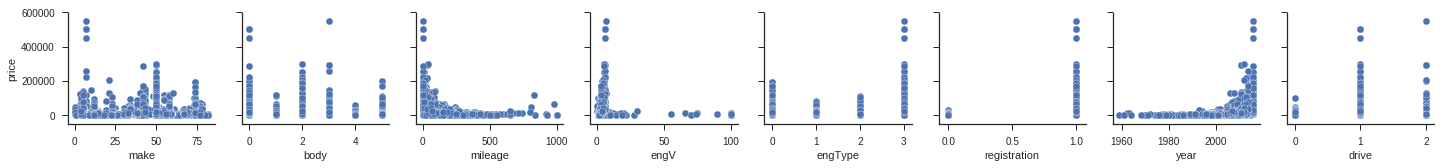

In [81]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(data=df, y_vars=['price'], x_vars=X_df.columns);

## 1.2 Split the data into test and train datasets using train_test_split

In [0]:
# Using the X matrix and y vector in train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, random_state=42)

## 1.3 Use Scikit-Learn to fit a multiple regression model using your training data.

In [0]:
# Fitting the training data
lm = LinearRegression().fit(X_train, y_train)

## 1.4 Report the Intercept and Coefficient Values for the fitted model

In [68]:
# Applying .coef_ to the fitted model
print("Fitted Model Coefficient Values:\n {}".format(dict(zip(X_df.columns, lm.coef_))))
print("")
# Applying the .intercept_ to the fitted model
print("Fitted model Intercept value\n {}".format(lm.intercept_))

Fitted Model Coefficient Values:
 {'make': -33.80914554237605, 'body': -1721.0250109848403, 'mileage': -39.96352171750823, 'engV': 272.10204942616076, 'engType': -1085.3334443364547, 'registration': 4487.518109358849, 'year': 1145.2506680966533, 'drive': 8462.04541338759}

Fitted model Intercept value
 -2278702.1490454697


## 1.5 Use the test data to make predictions

In [59]:
# Apply the .predict to the test data
predictions = lm.predict(X_test)
print("Test set predictions:\n {}".format(predictions))

Test set predictions:
 [19194.45968216  5367.93233327 26151.89784368 ... 21790.01574206
 11486.29535553  8099.62613193]


## 1.6 Calculate and report both the Root-Mean-Square error and $R^2$ for the model. 

In [0]:
# Calculating the RMSE for the model
RMSE = np.sqrt((mean_squared_error(y_test, predictions)))

# Calculating the R^2 for the model
r2 = r2_score(y_test, predictions)

In [62]:
# Report the RMSE and R^2 for the model
print("The RMSE:\n{}".format(RMSE))
print("")
print("The R^2:\n{}".format(r2))

The RMSE:
20338.843481632106

The R^2:
0.30479352255023595


## 1.7 How should we interpret the coefficient corresponding to the "year" feature?

The year feature appears to be a strong potenial feature for the data.

## 1.8 How should we interpret the Root-Mean-Square Error?

The RMSE is very high, indicating that there is not a good fit.

## 1.9 How should we interpret the $R^2$?

The R^2 is very low, indicating that the predictive power is not strong

# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

In [69]:
# Applying the log function to the price and adding it to the DataFrame
df['log_price'] = np.log(df['price'])
df.head()

,make,price,body,mileage,engV,engType,registration,year,drive,log_price
0,23,15500.0,0,68,2.5,1,1,2010,1,9.648595
1,50,20500.0,3,173,1.8,1,1,2011,2,9.928180
2,50,35000.0,2,135,5.5,3,1,2008,2,10.463103
3,50,17800.0,5,162,1.8,0,1,2012,0,9.786954
4,55,16600.0,0,83,2.0,3,1,2013,1,9.717158


In [0]:
log_df_x = df.drop(['price', 'log_price'], axis=1)
log_y = df['log_price']

## 2.2 Use scatterplots or seaborn's pairplot function to do the "eyeball test" for non-linearly distributed features.

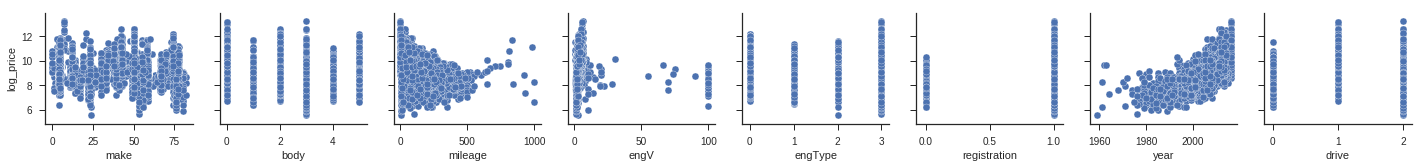

In [73]:
X_columns = df.columns.drop(['price', 'log_price'])
sns.set(style="ticks", color_codes=True)
sns.pairplot(data=df, y_vars=['log_price'], x_vars=X_columns);

The engV appears to be the strongest non-linear distributed feature

## 2.3 If appropriate, create any polynomial features. 

In [0]:
# Not creating any polynomial features

## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [0]:
# Using the X matrix and y vector in train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(log_df_x, log_y, random_state=42)

In [0]:
# Fitting the training data
lm1 = LinearRegression().fit(X_train1, y_train1)

In [77]:
# Applying .coef_ to the fitted model
print("Fitted Model Coefficient Values:\n {}".format(dict(zip(log_df_x.columns, lm1.coef_))))
print("")
# Applying the .intercept_ to the fitted model
print("Fitted model Intercept value\n {}".format(lm1.intercept_))

Fitted Model Coefficient Values:
 {'make': -0.0014268497495636891, 'body': -0.08991450866562556, 'mileage': -2.5694216825133953e-05, 'engV': 0.008849929516122094, 'engType': -0.05850539073146145, 'registration': 0.7301084292756336, 'year': 0.09545435796934032, 'drive': 0.39562231097242434}

Fitted model Intercept value
 -182.91291831659342


In [78]:
# Apply the .predict to the test data
predictions1 = lm1.predict(X_test1)
print("Test set predictions:\n {}".format(predictions1))

Test set predictions:
 [9.42250949 8.70112879 9.79139196 ... 9.51005757 8.95061883 8.23053577]


In [0]:
# Calculating the RMSE for the model
RMSE1 = np.sqrt((mean_squared_error(y_test1, predictions1)))

# Calculating the R^2 for the model
r_2 = r2_score(y_test1, predictions1)

In [80]:
# Report the RMSE and R^2 for the model
print("The RMSE:\n{}".format(RMSE1))
print("")
print("The R^2:\n{}".format(r_2))

The RMSE:
0.5788740609262718

The R^2:
0.6447468333440143


## 2.5 How might we interpret the coefficient on "year" in this new regression model?

The year coefficient is much stronger now after the transformation. The model fits the year feature extremely well.

# Gradient Descent

## 3.1 What does Gradient Descent seek to minimize?

The gradient seeks to minimize a cost function. The gradient (or derivative) tells us the incline or slope of the cost function. Hence, to minimize the cost function, we move in the direction opposite to the gradient.

## 3.2 What is the "Learning Rate" and what is its function?

Learning rate (alpha) controls how much we are adjusting the weights/coeffients of our model with respect to the  loss gradient. The lower the value, the slower we travel along the downward slope. 

Using a low learning rate improves the possibility of not missing any local minima but at the cost of time. Using too high of a learning can cause oscillation or never reaching a minima.

# Model Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [89]:
log_df_x = sm.add_constant(log_df_x)
model = sm.OLS(log_y, log_df_x).fit(cov_type='HC3') 
predictions2 = model.predict(log_df_x) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     1654.
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        18:51:49   Log-Likelihood:                -7167.0
No. Observations:                8495   AIC:                         1.435e+04
Df Residuals:                    8486   BIC:                         1.442e+04
Df Model:                           8                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -181.8341      3.453    -52.653   

## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. Do we have multicollinearity problems?

In [0]:
# Calculate VIF
vif = [variance_inflation_factor(log_df_x.values, i) for i in range(log_df_x.shape[1])]

In [91]:
# Check for multicollinearity issues
VIF = dict(zip(log_df_x.columns, vif))
print(VIF)

{'const': 123262.01363199769, 'make': 1.0591492515492282, 'body': 1.1583256001339475, 'mileage': 1.5496097971160896, 'engV': 1.0093210319338703, 'engType': 1.1411828507373443, 'registration': 1.0918920928785216, 'year': 1.4585277185506464, 'drive': 1.1310208897031016}


There are no numbers greater than 10. This means there are no multicollinearity issues

In [92]:
# Using a correlation matrix to verify if the variables highlighted by the VIF test are not highly correlated
log_df_x.corr()

,const,make,body,mileage,engV,engType,registration,year,drive
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
make,NaN,1.000000,0.026127,-0.035097,-0.021246,-0.011880,0.104557,-0.013833,-0.196444
body,NaN,0.026127,1.000000,0.287060,-0.025320,-0.184007,-0.082643,-0.154554,-0.162235
mileage,NaN,-0.035097,0.287060,1.000000,0.042081,-0.229644,-0.229354,-0.503135,0.067962
engV,NaN,-0.021246,-0.025320,0.042081,1.000000,-0.004896,-0.015274,-0.041076,0.084756
engType,NaN,-0.011880,-0.184007,-0.229644,-0.004896,1.000000,0.152988,-0.040471,-0.044859
registration,NaN,0.104557,-0.082643,-0.229354,-0.015274,0.152988,1.000000,0.185104,-0.055793
year,NaN,-0.013833,-0.154554,-0.503135,-0.041076,-0.040471,0.185104,1.000000,-0.169709
drive,NaN,-0.196444,-0.162235,0.067962,0.084756,-0.044859,-0.055793,-0.169709,1.000000
